In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('test.csv')

In [27]:
# Dimensiones
df.shape

(418, 11)

In [28]:
# Nombre de las columnas
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
# Tipos de datos
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
# Descripción variables numéricas
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [32]:
# Valores únicos
df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [33]:
# Valores nulos
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
# Muestra de datos
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [35]:
# EDA datos titanic
# Limpieza de los datos

df_cleaned = df.copy()

In [36]:
# Eliminación de variables redundantes o poco útiles
df_cleaned = df_cleaned.copy().drop(['Name','Ticket','Cabin'],
axis=1)

In [37]:
# Rellenar los valores nulos de Age y embarked
mean = df_cleaned['Age'].mean()
df_cleaned['Age'].fillna(mean, inplace=True)

mode = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(mode, inplace=True)

C:\Users\molap\AppData\Local\Temp\ipykernel_2428\1075917421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(mean, inplace=True)
C:\Users\molap\AppData\Local\Temp\ipykernel_2428\1075917421.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [38]:
# Busqueda de outliers
Q1 = df_cleaned['Fare'].quantile(0.25)
Q3 = df_cleaned['Fare'].quantile(0.75)
IQR = Q3-Q1
cota_sup = Q3+1.5*IQR
outliers = (df_cleaned['Fare'] > cota_sup).sum()

print(f" Valores atipicos en Fare: {outliers}")
print(f" Cota superior: {cota_sup:.2f}")
print(f" Valor maximo: {df_cleaned['Fare'].max():.2f}")

 Valores atipicos en Fare: 55
 Cota superior: 66.91
 Valor maximo: 512.33


In [39]:
df_cleaned.shape

(418, 8)

<Axes: >

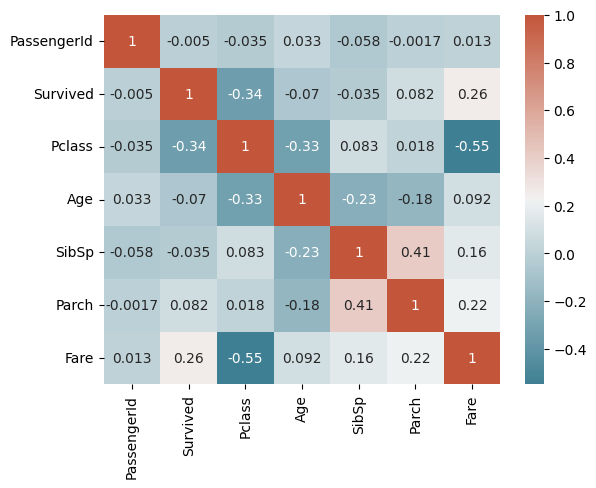

In [16]:
# Matriz de correlación para las variables numéricas
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

corr = df_cleaned[numeric_cols].corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True) 
)

In [17]:
# Correlaciones con Survived
survived_corr = corr['Survived'].sort_values(ascending=False)
print(survived_corr)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


<Axes: xlabel='Age', ylabel='Fare'>

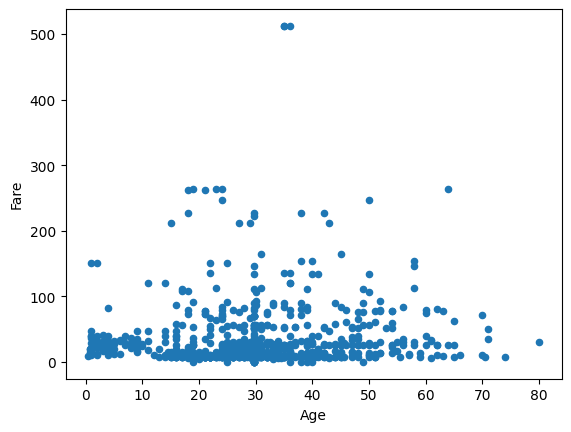

In [18]:
# Scatterplot
# Las primeras variables que graficaremos para entender su relación son:
# Age y Fare

df_cleaned.plot(kind='scatter',x='Age',y='Fare')

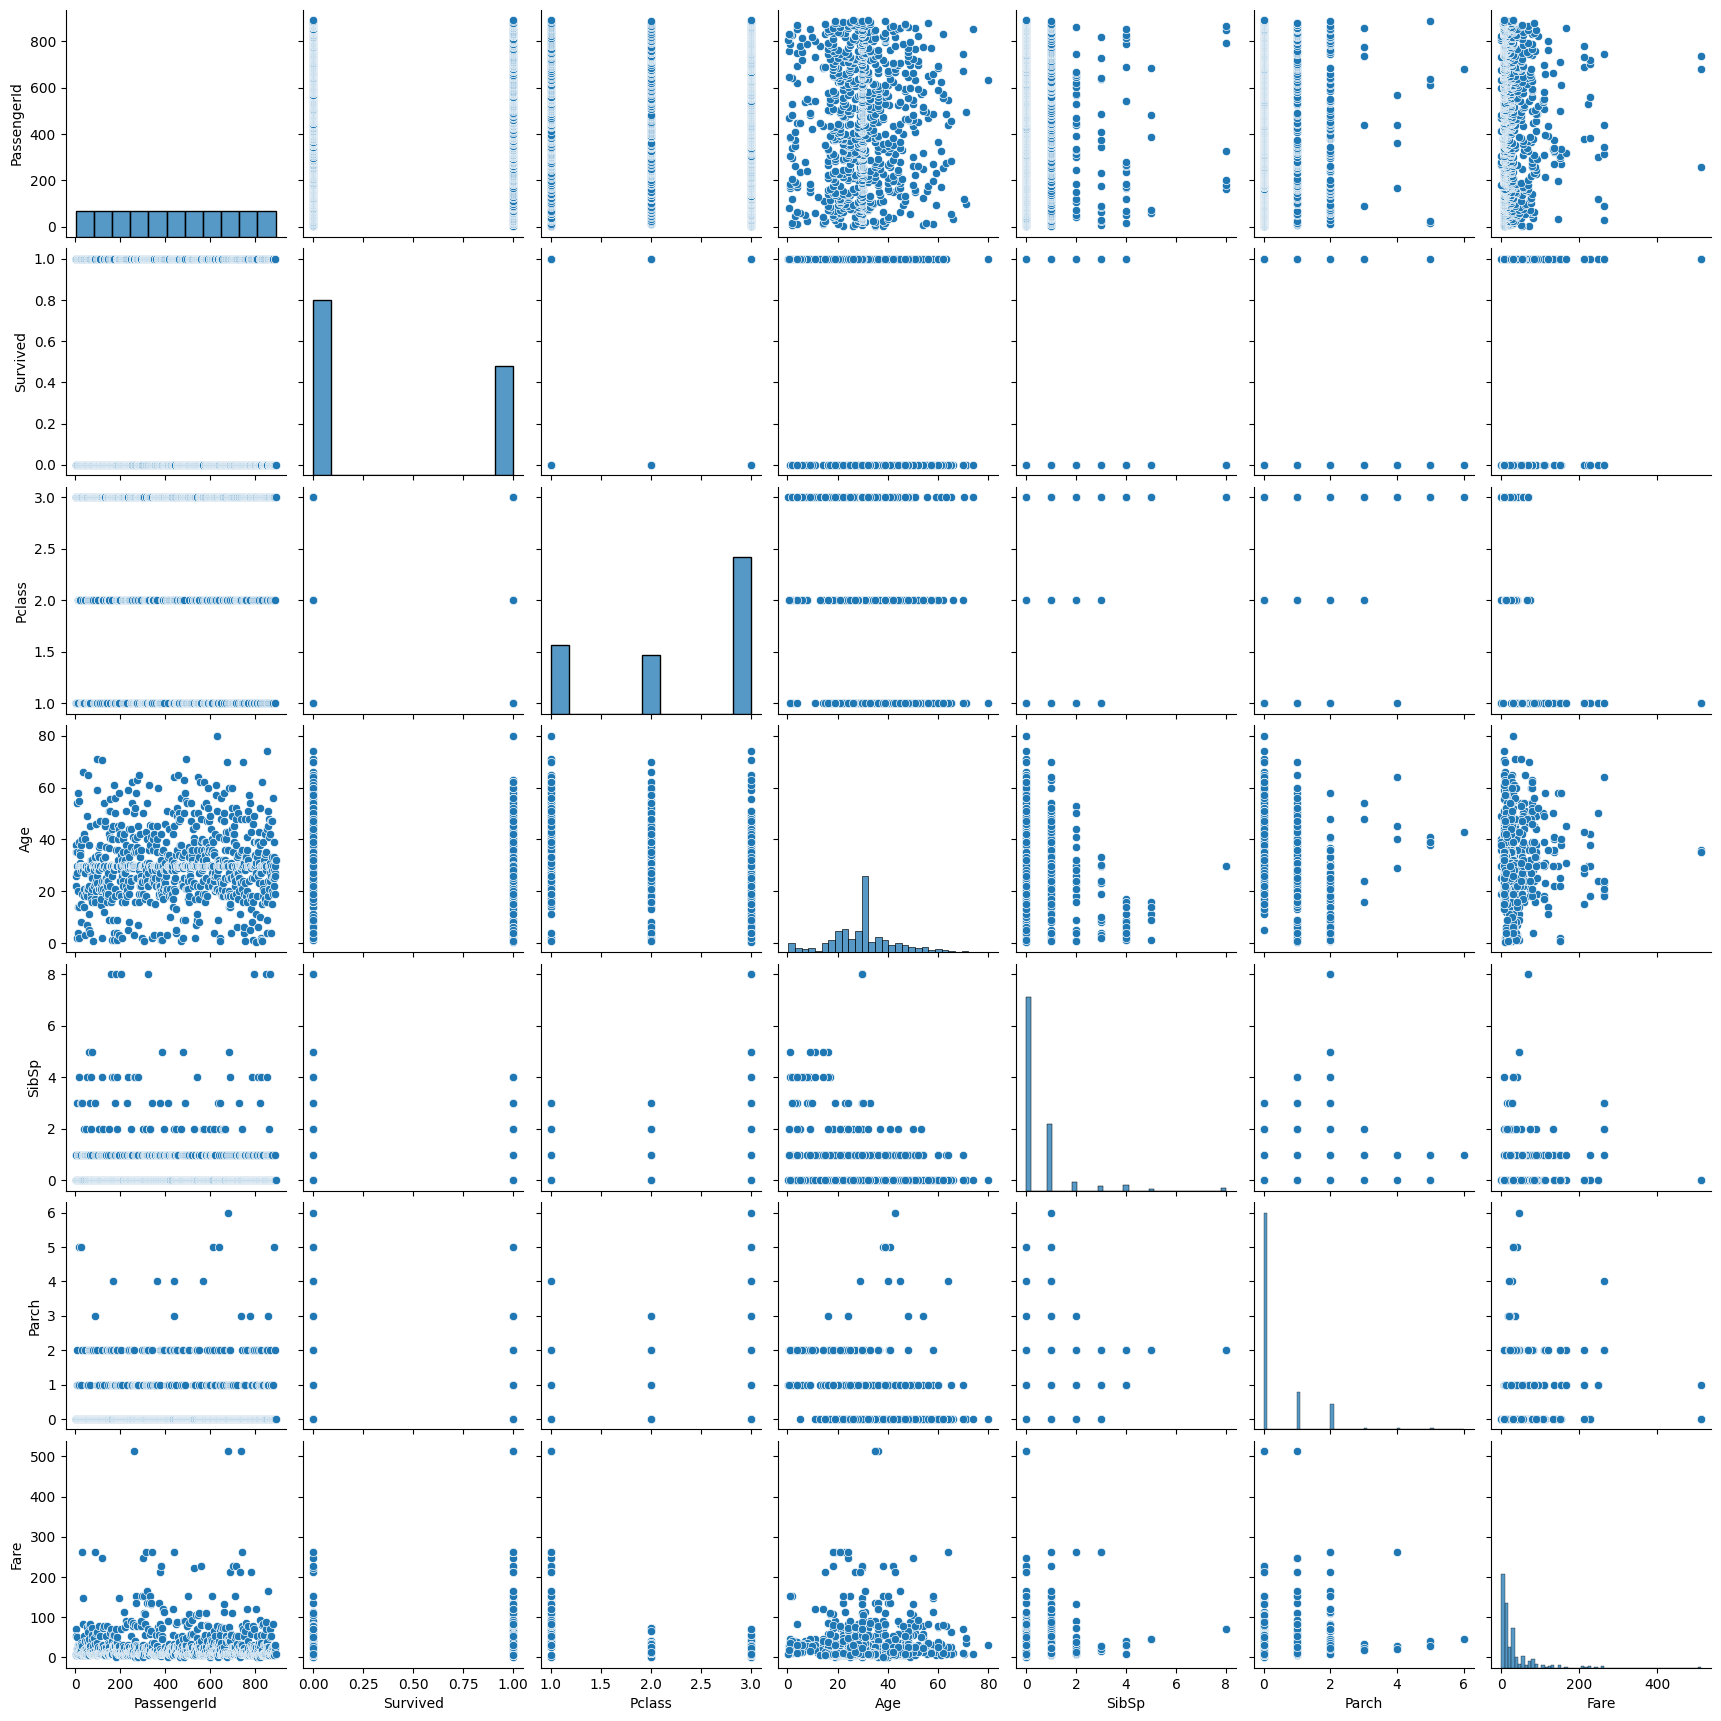

In [19]:
# Ahora vamos a ver como la relación entre todas las variables
sns.pairplot(df_cleaned)

<Axes: ylabel='Frequency'>

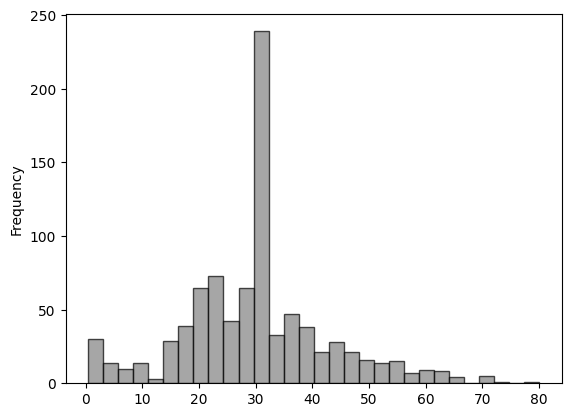

In [20]:
# Histogram
# El primero que veremos será el de edad
df_cleaned['Age'].plot(kind='hist', bins=30, color='grey', edgecolor='black', alpha=0.7)

<Axes: ylabel='Frequency'>

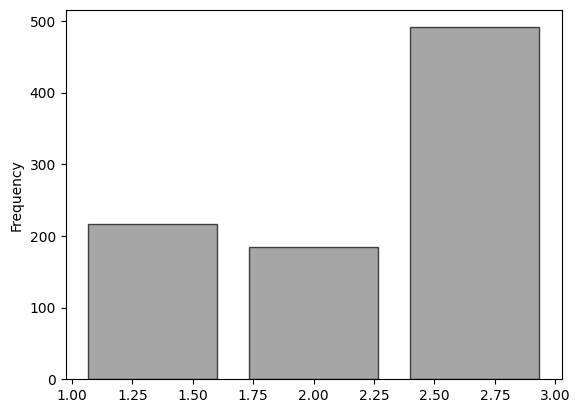

In [21]:
# también veremos el histograma de las clases
df_cleaned['Pclass'].plot(kind='hist', bins=3, color='grey', edgecolor='black', alpha=0.7, rwidth=0.8)

<Axes: >

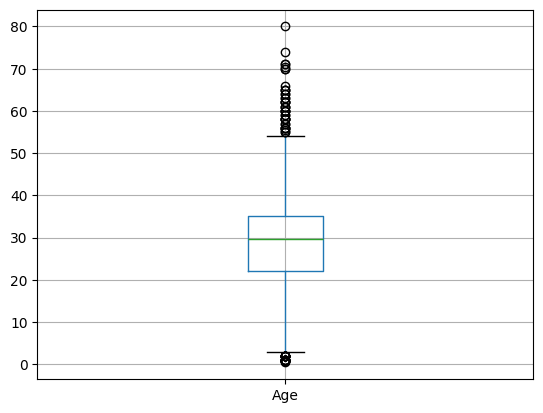

In [22]:
# Boxplots
df_cleaned.boxplot('Age')


<Axes: >

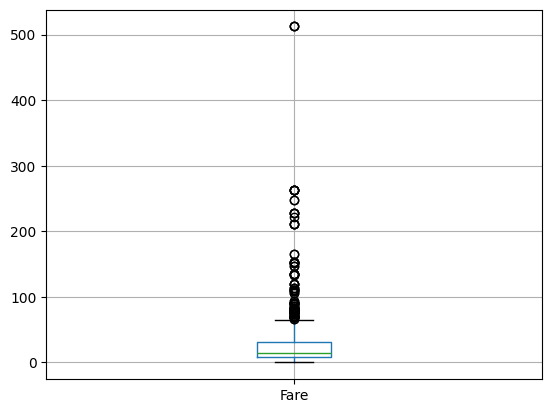

In [23]:
df_cleaned.boxplot('Fare')


C:\Users\molap\AppData\Local\Temp\ipykernel_2428\780415922.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Pclass', y='Fare',


<Axes: xlabel='Pclass', ylabel='Fare'>

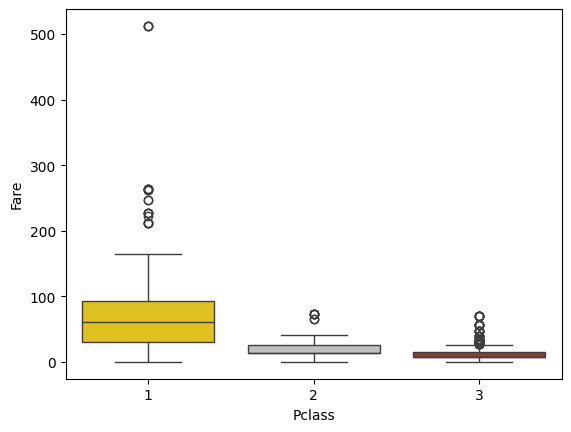

In [24]:
sns.boxplot(data=df_cleaned, x='Pclass', y='Fare', 
           palette=['gold', 'silver', 'brown'])

In [40]:
# Guardar el archivo limpio
df_cleaned.to_csv('titanic_test_cleaned.csv', index=False)